# Сессия 4

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

читаем и предобрабатываем данные

In [2]:
sop1 = pd.read_csv("sop1_t.csv", index_col=0)
sop2 = pd.read_csv("sop2_t.csv", index_col=0)
sop3 = pd.read_csv("sop3_t.csv", index_col=0)

In [3]:
k3 = pd.read_csv("./Results/Results/К3.dat", engine="python", sep="\s+", header=None, skiprows=1, index_col=0)
k16 = pd.read_csv("./Results/Results/К16.dat", engine="python", sep="\s+", header=None, skiprows=1, index_col=0)
k22 = pd.read_csv("./Results/Results/К22.dat", engine="python", sep="\s+", header=None, skiprows=1, index_col=0)
k24 = pd.read_csv("./Results/Results/К24.dat", engine="python", sep="\s+", header=None, skiprows=1, index_col=0)
k28 = pd.read_csv("./Results/Results/К28.dat", engine="python", sep="\s+", header=None, skiprows=1, index_col=0)

In [4]:
k3 = k3.reset_index()
k3 = k3.drop([0],axis=1)
k22 = k22.reset_index()
k22 = k22.drop([0],axis=1)
k16 = k16.reset_index()
k16 = k16.drop([0],axis=1)
k24 = k24.reset_index()
k24 = k24.drop([0],axis=1)
k28 = k28.reset_index()
k28 = k28.drop([0],axis=1)

In [5]:
t3 = pd.read_csv("./Target/Target/k3.csv").fillna(3)
t16 = pd.read_csv("./Target/Target/k16.csv").fillna(3)
t22 = pd.read_csv("./Target/Target/k22.csv").fillna(3)
t24 = pd.read_csv("./Target/Target/k24.csv").fillna(3)
t28 = pd.read_csv("./Target/Target/k28.csv").fillna(3)

Делеам сдвиги

In [6]:
hord = [1,2,7,8,11,12,13,14,15,16]
rs=[3,4,5,6,10]

In [7]:
def sh(data):
    for i in hord:
        data[i] = pd.concat([data[i][145:],data[i][:145]],ignore_index=True)
    for i in rs:
        data[i] = pd.concat([data[i][50:],data[i][:50]],ignore_index=True)

In [8]:
for i in [k3,k16,k22,k24,k28]:
    sh(i)

Создаем новые переменные

In [9]:
E = [1, 3, 7, 8]
EC = [9, 11, 15, 16]
SH = [5, 6, 13, 14]

In [10]:
def newvals(df, data, n):
    df[n + "_mean"]=data.mean(axis=1)
    df[n + "_median"]=data.median(axis=1)
    df[n + "_std"]=data.std(axis=1)
    df[n + "_min"]=data.min(axis=1)
    df[n + "_max"]=data.max(axis=1)

In [11]:
for i in [k3,k16,k22,k24,k28]:
    newvals(i, i[E], "echo")
    newvals(i, i[EC], "echo_cont")
    newvals(i, i[SH], "shadow")


In [12]:
nv=[]
for i in ["echo","echo_cont","shadow"]:
    for j in ["_mean","_median","_std","_min","_max",]:
        nv.append(i+j)

Обрезаем 

In [13]:
k3 = k3[:1020]
k16 = k16[:1020]
k22 = k22[:1020]
k24 = k24[:1020]
k28 = k28[:1020]

Обрабатываем и создаем новые таргетные значения  для каждого из параметров: Начало, длина, высота, тип и сторона 

In [14]:
Tlen=[]
for tar in [t3,t16,t22,t24,t28]:
    tmp = pd.DataFrame(data=[0]*1020, columns=["T"])
    for start, leng in zip(tar["Начало дефекта"],tar["Длина дефекта"]):
        tmp[start:start+int(leng)] = 1
    Tlen.append(tmp)

In [15]:
Tst=[]
for tar in [t3,t16,t22,t24,t28]:
    tmp = pd.DataFrame(data=[0]*1020)
    for start, leng in zip(tar["Начало дефекта"],tar["Длина дефекта"]):
        tmp[start:start+int(leng)] = start
    Tst.append(tmp)

In [16]:
THeight = []
for tar in [t3,t16,t22,t24,t28]:
    tmp = pd.DataFrame(data=[0]*1020)
    for start, leng, heig in zip(tar["Начало дефекта"],tar["Длина дефекта"],tar["Высота дефекта"]):
        tmp[start:start+int(leng)] = heig
    THeight.append(tmp)

In [17]:
def toInt(t):
    t["Тип дефекта"]=t["Тип дефекта"].replace({"L": 0, "T": 1})
    t["Сторона"]=t["Сторона"].replace({"A": 0, "B": 1, " ": 2})

In [18]:
toInt(t3)
toInt(t16)
toInt(t22)
toInt(t24)
toInt(t28)

In [19]:
Ttype = []
for tar in [t3,t16,t22,t24,t28]:
    tmp = pd.DataFrame(data=[3]*1020)
    for start, leng, typ in zip(tar["Начало дефекта"],tar["Длина дефекта"],tar["Тип дефекта"]):
        tmp[start:start+int(leng)] = typ
    Ttype.append(tmp)

In [23]:
Tside = []
for tar in [t3,t16,t22,t24,t28]:
    tmp = pd.DataFrame(data=[3]*1020)
    for start, leng, side in zip(tar["Начало дефекта"],tar["Длина дефекта"],tar["Сторона"]):
        tmp[start:start+int(leng)] = side
    Tside.append(tmp)
    

In [21]:
k28 = k28.append(k28.iloc[1018],ignore_index=True)

есть k3,k16,k22,k24,k28 это данные и есть Tlen Tst THeight Ttype Tside это массивы с метками по разным категориям. Объеденим к3 и к28 в тренировочную выборку а остальное в тестовую. мы так объеденили потому что в к3 и в к28 есть необходимые нам данные для обучения в нормально количестве

In [45]:
data_train = pd.concat([k3,k28])

In [33]:
data_test = pd.concat([k16,k22,k24])

In [34]:
tar_train_len = pd.concat([Tlen[0],Tlen[-1]])
tar_train_st = pd.concat([Tst[0],Tst[-1]])
tar_train_heig = pd.concat([THeight[0],THeight[-1]])
tar_train_type = pd.concat([Ttype[0],Ttype[-1]])
tar_train_side = pd.concat([Tside[0],Tside[-1]])

In [35]:
tar_test_len = pd.concat([Tlen[1],Tlen[2],Tlen[3]])
tar_test_st = pd.concat([Tst[1],Tst[2],Tst[3]])
tar_test_heig = pd.concat([THeight[1],THeight[2],THeight[3]])
tar_test_type = pd.concat([Ttype[1],Ttype[2],Ttype[3]])
tar_test_side = pd.concat([Tside[1],Tside[2],Tside[3]])

Сохраняем 

In [46]:
data_train.to_csv("./myTrainTest/data_train.csv")
data_test.to_csv("./myTrainTest/data_test.csv")

tar_train_len.to_csv("./myTrainTest/tar_train_len.csv")
tar_train_st.to_csv("./myTrainTest/tar_train_st.csv")
tar_train_heig.to_csv("./myTrainTest/tar_train_heig.csv")
tar_train_type.to_csv("./myTrainTest/tar_train_type.csv")
tar_train_side.to_csv("./myTrainTest/tar_train_side.csv")

tar_test_len.to_csv("./myTrainTest/tar_test_len.csv")
tar_test_st.to_csv("./myTrainTest/tar_test_st.csv")
tar_test_heig.to_csv("./myTrainTest/tar_test_heig.csv")
tar_test_type.to_csv("./myTrainTest/tar_test_type.csv")
tar_test_side.to_csv("./myTrainTest/tar_test_side.csv")

Этап моделирования, возьмем 7 разных классификаторов и выясним какой из них будет лучше работать 

In [38]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [51]:
models = [LogisticRegression(random_state=42),
          LinearDiscriminantAnalysis(),
          KNeighborsClassifier(n_neighbors=5), 
          GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          SVC(random_state=42),
          RandomForestClassifier(random_state=42, n_estimators=100), 
          ]

In [47]:
dftr = pd.concat([sop2,sop3])
dftest = sop1

In [52]:
X_train = dftr.drop("target", axis=1)
y_train = dftr["target"]

X_test = dftest.drop("target", axis=1)
y_test = dftest["target"]

In [53]:
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score  

Код по обучению, предсказанию, подсчету точности, построению матрицы ошибок и отчету о классификации

In [60]:
TestModels = pd.DataFrame()
tmp = {}

for model in models:
    print(model)
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    tmp['accuracy_score'] = accuracy_score(pred, y_test)
    tmp['classification_report'] = classification_report(pred, y_test)
    tmp['confusion_matrix'] = confusion_matrix(pred, y_test)
    
    print('accuracy_score', accuracy_score(pred, y_test))
#     print('classification_report', classification_report(pred, y_test))
#     print('confusion_matrix', confusion_matrix(pred, y_test))
#     print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    TestModels = TestModels.append([tmp])
TestModels.set_index('Model', inplace=True)

 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy_score 0.9196078431372549
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
accuracy_score 0.9098039215686274
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
accuracy_score 0.8852941176470588
GaussianNB(priors=None, var_smoothing=1e-09)
accuracy_score 0.9156862745098039
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                  

Логистическая регрессия показала лучший результат с точностью 91.9%

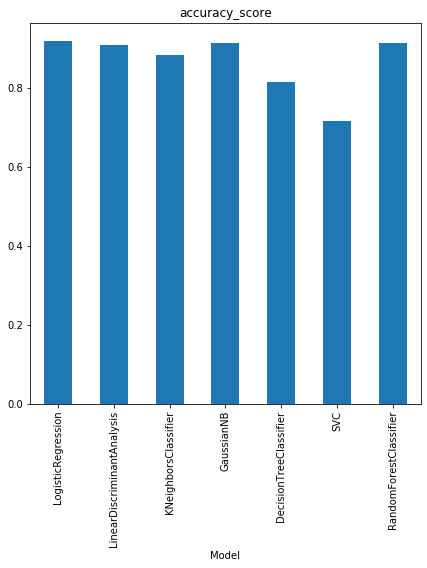

In [61]:
fig, axes = plt.subplots(ncols=1, figsize=(7, 7))
TestModels.accuracy_score.plot(ax=axes, kind='bar', title='accuracy_score')
plt.show()

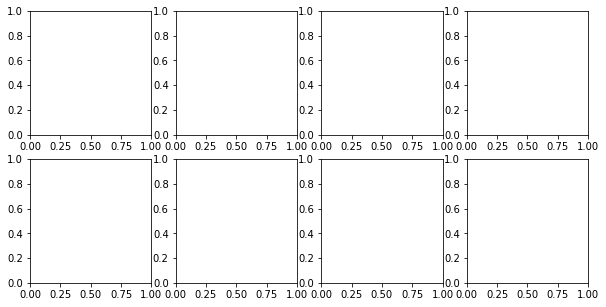

In [74]:
fig, axes = plt.subplots(ncols=4,nrows=2, figsize=(10,5))

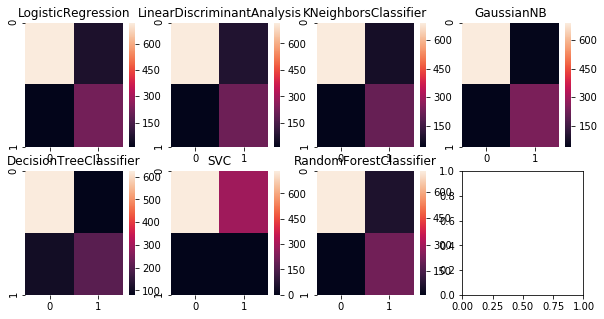

In [75]:
a=[]
for i in axes:
    for j in i:
        a.append(j)
for i, ax, tit in zip(TestModels["confusion_matrix"], a, TestModels.index):
    sns.heatmap(i,ax=ax).set_title(tit)
fig

Нахождение промежутков из нашего предсказания

In [79]:
mas=[]
for i in range(len(pred)):
    if pred[i]!=0:
        mas.append(i)

In [87]:
print(mas[0], end=' ')
for i in range(len(mas)-1):
    if mas[i]+1 != mas[i+1]:
        print(mas[i])
        print(mas[i+1], end = " ")
print(mas[-1])

55 91
202 233
286 303
305 306
308 314
357 357
361 406
467 479
507 507
621 621
627 631
641 642
747 747
848 874
969 1008


Сохраняем модель для её дальнейшего использования

In [88]:
import pickle

In [89]:
pkl_filename = "LR_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)